## Reading Library

In [3]:
import numpy as np                        ## Main Library
import pandas as pd                       ## Main Library
import matplotlib.pyplot as plt           ## Plotting Graphs
%matplotlib inline
from patsy import dmatrices                
import sklearn                            ## Used for Building model
import seaborn as sns                     ## Statistical plotting
import statsmodels.api as sm              ##Statistical Features
from scipy import stats
import warnings                           ## Remove warnings
warnings.filterwarnings("ignore")
from scipy.special import factorial

In [4]:
## Importing Data
df=pd.read_csv("DataFinal.csv")
df.head()

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
0,93.47,7157.0,33.0,Y,1.0,10000000.0,HDFC BANK,bangalore,Tier I,"(6.999, 33.0]",...,10000000,North 1,18,7,7,Delhi,Delhi,1,NN,3084.51
1,81.59,25000.0,42.0,N,3.0,145501.0,HDFC BANK,others,Tier III,"(41.0, 50.0]",...,145501,West,18,3,31,Ahmedabad,Ahmedabad,1,NN,3426.78
2,87.58,35000.0,35.0,Y,2.0,800000.0,Ex-HDFC,jaipur,Tier II,"(50.0, 66.0]",...,1600000,North 2,18,6,9,Jaipur,Jaipur,1,NN,3065.30
3,80.18,100000.0,12.0,Y,2.0,1000000.0,HDFC BANK,jaipur,Tier II,"(6.999, 33.0]",...,2000000,North 2,18,2,21,Jaipur,Mumbai,1,NN,962.16
4,97.19,15000.0,45.0,Y,2.0,300000.0,HDFC BANK,others,Tier III,"(33.0, 41.0]",...,165000,West,18,6,6,others,others,1,NN,4373.55


In [5]:
## Display all column names
names = df.columns.values 
print(names)

['Mapped Agent 13M Persistency' "Applicant's Policy Annualized Premium"
 'Mapped Agent Vintage' 'Auto Debit of Premium Opted Flag(Yes/No)'
 'Application Life Assured BMI'
 'Total Risk Exposure of HDFC Life w.r.t. Life Assured'
 'Application  Sourcing Channel' 'Application  Life Assured City'
 'Application  Life Assured City Tier' 'Application  Life Assured Age'
 'Application  Life Assured Education' 'Application  Life Assured Gender'
 'Application  Life Assured Income' 'Application  Life Assured Industry'
 'Application  Life Assured Marital Status'
 'Application  Life Assured Occupation'
 "Applicant's Policy PAR/NON PAR/ULIP Tag"
 'Application Specific Sourcing Partner' 'First Premium Payment Type'
 "Applicant's Policy Product Category"
 "Applicant's Policy Premium Payment Frequency"
 "Applicant's Policy Product Name"
 "Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')"
 'Application Life Assured Residential Status'
 "Applicant's Policy Risk Cessation Term"
 "Applicant's Policy Rid

In [6]:
## Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25320 entries, 0 to 25319
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Mapped Agent 13M Persistency                           25320 non-null  float64
 1   Applicant's Policy Annualized Premium                  25320 non-null  float64
 2   Mapped Agent Vintage                                   25320 non-null  float64
 3   Auto Debit of Premium Opted Flag(Yes/No)               25320 non-null  object 
 4   Application Life Assured BMI                           25320 non-null  float64
 5   Total Risk Exposure of HDFC Life w.r.t. Life Assured   25320 non-null  float64
 6   Application  Sourcing Channel                          25320 non-null  object 
 7   Application  Life Assured City                         25320 non-null  object 
 8   Application  Life Assured City Tier           

In [7]:
## Standard Deviation of all attributes
df.std()

Mapped Agent 13M Persistency                             1.439343e+01
Applicant's Policy Annualized Premium                    7.173271e+04
Mapped Agent Vintage                                     1.803208e+01
Application Life Assured BMI                             1.631083e+00
Total Risk Exposure of HDFC Life w.r.t. Life Assured     4.910357e+06
Application  Life Assured Income                         1.486164e+06
Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')    3.064271e-01
Applicant's Policy Risk Cessation Term                   7.217959e+00
Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')     4.996883e-01
Applicant's Policy Sum Assured                           2.685334e+06
Application Login year                                   2.972338e-01
Application Login month                                  3.717016e+00
Application Login day                                    9.387921e+00
Target                                                   4.152279e-01
Perf+vintage        

## Label Encoding

In [8]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [9]:
df['Auto Debit of Premium Opted Flag(Yes/No)']= label_encoder.fit_transform(df['Auto Debit of Premium Opted Flag(Yes/No)']) 
df['Auto Debit of Premium Opted Flag(Yes/No)'].unique() 

array([1, 0])

In [10]:
df['Application  Sourcing Channel']= label_encoder.fit_transform(df['Application  Sourcing Channel']) 
df['Application  Sourcing Channel'].unique() 


array([2, 1, 0, 3, 4, 5, 6])

In [11]:
df['Application  Life Assured City']= label_encoder.fit_transform(df['Application  Life Assured City']) 
df['Application  Life Assured City'].unique() 

array([ 1, 10,  6, 11,  2,  9, 12,  4,  7,  0,  8,  5,  3, 13])

In [12]:
df['Application  Life Assured City Tier']= label_encoder.fit_transform(df['Application  Life Assured City Tier']) 
df['Application  Life Assured City Tier'].unique() 

array([0, 2, 1])

In [13]:
df['Application  Life Assured Education']= label_encoder.fit_transform(df['Application  Life Assured Education']) 
df['Application  Life Assured Education'].unique() 

array([ 4,  1,  0, 11,  6,  2,  3, 12,  7,  8,  5,  9, 10])

In [14]:
df['Application  Life Assured Gender']= label_encoder.fit_transform(df['Application  Life Assured Gender']) 
df['Application  Life Assured Gender'].unique()

array([0, 1])

In [15]:
df['Application  Life Assured Industry']= label_encoder.fit_transform(df['Application  Life Assured Industry']) 
df['Application  Life Assured Industry'].unique()

array([ 9, 10,  7,  8,  3,  2,  6,  1,  0,  4,  5])

In [16]:
df['Application  Life Assured Marital Status']= label_encoder.fit_transform(df['Application  Life Assured Marital Status']) 
df['Application  Life Assured Marital Status'].unique() 

array([2, 1, 3, 0])

In [17]:
df['Application  Life Assured Occupation']= label_encoder.fit_transform(df['Application  Life Assured Occupation']) 
df['Application  Life Assured Occupation'].unique() 

array([3, 4, 0, 2, 5, 6, 1])

In [18]:
df["Applicant's Policy PAR/NON PAR/ULIP Tag"]= label_encoder.fit_transform(df["Applicant's Policy PAR/NON PAR/ULIP Tag"]) 
df["Applicant's Policy PAR/NON PAR/ULIP Tag"].unique() 

array([0, 1, 2])

In [19]:
df['Application Specific Sourcing Partner']= label_encoder.fit_transform(df['Application Specific Sourcing Partner']) 
df['Application Specific Sourcing Partner'].unique() 

array([ 44,  46,  70,  80,  29,  95,  78,  73,  39,   9,  57,  45,  49,
        31,  85, 111, 122,  14,  90, 115,  12,   7,  10,  18,  24,  91,
        66,  51,  19, 109,   8, 102, 114,  77,  83,  22,  88, 108,  96,
        67,  41,  84,   3,  30, 107,  52,  20,  21, 116,  42,  47, 120,
        58,   0,  64, 118, 112,  94,  28, 110,  75,  36,  62,  74, 113,
       125, 121,  48,  65, 106, 103,  60,   6,  93,  71,  55, 119,  59,
       117,   4,  15,  27,  50,  11,   5, 124,  82,  54,  79,  16,  43,
        26,  53, 105,  86,  33,  97, 101, 104, 123,  72,  37,  25,  63,
        87,  92,  99,  56,  23,  61,  40,  35,  69,  34,   1,  89,  76,
        68,   2, 100,  32,  81,  98,  17,  38,  13])

In [20]:
df['First Premium Payment Type']= label_encoder.fit_transform(df['First Premium Payment Type']) 
df['First Premium Payment Type'].unique() 

array([4, 6, 1, 3, 7, 5, 8, 2, 0])

In [21]:
df["Applicant's Policy Product Category"]= label_encoder.fit_transform(df["Applicant's Policy Product Category"]) 
df["Applicant's Policy Product Category"].unique() 

array([2, 3, 1, 0])

In [22]:
df["Applicant's Policy Premium Payment Frequency"]= label_encoder.fit_transform(df["Applicant's Policy Premium Payment Frequency"]) 
df["Applicant's Policy Premium Payment Frequency"].unique() 

array([0, 2, 1, 3])

In [23]:
df["Applicant's Policy Product Name"]= label_encoder.fit_transform(df["Applicant's Policy Product Name"]) 
df["Applicant's Policy Product Name"].unique()

array([ 2,  7, 14,  4, 16,  1, 15, 17, 13,  6,  8, 10,  3,  9, 18,  5,  0,
       12, 11])

In [24]:
df['Application Life Assured Residential Status']= label_encoder.fit_transform(df['Application Life Assured Residential Status']) 
df['Application Life Assured Residential Status'].unique()

array([1, 0])

In [25]:
df['Application Life Assured State']= label_encoder.fit_transform(df['Application Life Assured State']) 
df['Application Life Assured State'].unique() 

array([ 3,  1,  8,  6,  5,  9,  4,  7, 10, 12,  0,  2, 11])

In [26]:
df['Application Sourcing Sub Channel']= label_encoder.fit_transform(df['Application Sourcing Sub Channel']) 
df['Application Sourcing Sub Channel'].unique() 

array([1, 3, 0, 2, 7, 6, 4, 5])

In [27]:
df['HDFC Life Operational Zone']= label_encoder.fit_transform(df['HDFC Life Operational Zone']) 
df['HDFC Life Operational Zone'].unique() 

array([1, 5, 2, 3, 4, 0])

In [28]:
df['Mapped Agent city']= label_encoder.fit_transform(df['Mapped Agent city']) 
df['Mapped Agent city'].unique() 

array([ 4,  0,  6, 10,  9,  3,  2,  7,  5,  8,  1])

In [29]:
df["Applicant's Policy Contract city"]= label_encoder.fit_transform(df["Applicant's Policy Contract city"]) 
df["Applicant's Policy Contract city"].unique() 

array([ 4,  0,  8, 10, 13, 11,  3,  2,  5,  9,  6,  7,  1, 12])

In [30]:
df["Application  Life Assured Age"]= label_encoder.fit_transform(df["Application  Life Assured Age"]) 
df["Application  Life Assured Age"].unique()

array([3, 1, 2, 0])

In [31]:
df["smoker_drinker"]= label_encoder.fit_transform(df["smoker_drinker"]) 
df["smoker_drinker"].unique()

array([0, 3, 2, 1])

## Model

### Logistic Regression

In [32]:
df.dtypes

Mapped Agent 13M Persistency                             float64
Applicant's Policy Annualized Premium                    float64
Mapped Agent Vintage                                     float64
Auto Debit of Premium Opted Flag(Yes/No)                   int32
Application Life Assured BMI                             float64
Total Risk Exposure of HDFC Life w.r.t. Life Assured     float64
Application  Sourcing Channel                              int32
Application  Life Assured City                             int32
Application  Life Assured City Tier                        int32
Application  Life Assured Age                              int32
Application  Life Assured Education                        int32
Application  Life Assured Gender                           int32
Application  Life Assured Income                         float64
Application  Life Assured Industry                         int32
Application  Life Assured Marital Status                   int32
Application  Life Assured

In [33]:
#from sklearn.preprocessing import StandardScaler
#scaler.fit(df.drop('Target',axis=1))
#scaled_features = scaler.transform(df.drop('Target',axis=1))

#df = pd.DataFrame(scaled_features,columns=df.columns[:-1])
#df.head()

In [34]:
df.drop(columns=['Application  Life Assured Marital Status', 'Application Login year',
                 'Application Login month','Application Login day',
                 'Mapped Agent city', 'Application  Life Assured City', 
            'Application Life Assured State','Application  Life Assured Education',
                'Application Life Assured Residential Status'], inplace=True)

In [35]:
df

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City Tier,Application Life Assured Age,Application Life Assured Gender,...,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
0,93.47,7157.0,33.0,1,1.0,10000000.0,2,0,3,0,...,1,40,1,1,10000000,1,4,1,0,3084.51
1,81.59,25000.0,42.0,0,3.0,145501.0,2,2,1,1,...,0,16,0,1,145501,5,0,1,0,3426.78
2,87.58,35000.0,35.0,1,2.0,800000.0,1,1,2,1,...,0,15,1,3,1600000,2,8,1,0,3065.30
3,80.18,100000.0,12.0,1,2.0,1000000.0,2,1,3,1,...,0,10,1,1,2000000,2,10,1,0,962.16
4,97.19,15000.0,45.0,1,2.0,300000.0,2,2,0,1,...,0,20,1,1,165000,5,13,1,0,4373.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25315,80.18,65000.0,1.0,0,2.0,2840000.0,1,2,3,1,...,0,20,1,3,5200000,1,13,0,0,80.18
25316,80.18,60000.0,6.0,0,2.0,2200000.0,1,1,3,1,...,0,25,1,3,4400000,0,7,0,0,481.08
25317,80.18,50000.0,9.0,0,2.0,350000.0,2,1,2,0,...,0,10,0,2,350000,1,13,0,0,721.62
25318,80.18,25000.0,11.0,0,2.0,625000.0,1,2,3,1,...,0,10,1,3,1250000,2,13,0,0,881.98


In [36]:
## we split the data into training and testing sets
## Importing library of train & test data from sklearn
from sklearn.model_selection import train_test_split

In [37]:
## Features for training and testing purpose(Indepedndent variable)
x = df.loc[:, df.columns != 'Target']
x

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City Tier,Application Life Assured Age,Application Life Assured Gender,...,Applicant's Policy Product Name,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Applicant's Policy Contract city,smoker_drinker,Perf+vintage
0,93.47,7157.0,33.0,1,1.0,10000000.0,2,0,3,0,...,2,1,40,1,1,10000000,1,4,0,3084.51
1,81.59,25000.0,42.0,0,3.0,145501.0,2,2,1,1,...,7,0,16,0,1,145501,5,0,0,3426.78
2,87.58,35000.0,35.0,1,2.0,800000.0,1,1,2,1,...,14,0,15,1,3,1600000,2,8,0,3065.30
3,80.18,100000.0,12.0,1,2.0,1000000.0,2,1,3,1,...,4,0,10,1,1,2000000,2,10,0,962.16
4,97.19,15000.0,45.0,1,2.0,300000.0,2,2,0,1,...,16,0,20,1,1,165000,5,13,0,4373.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25315,80.18,65000.0,1.0,0,2.0,2840000.0,1,2,3,1,...,4,0,20,1,3,5200000,1,13,0,80.18
25316,80.18,60000.0,6.0,0,2.0,2200000.0,1,1,3,1,...,4,0,25,1,3,4400000,0,7,0,481.08
25317,80.18,50000.0,9.0,0,2.0,350000.0,2,1,2,0,...,14,0,10,0,2,350000,1,13,0,721.62
25318,80.18,25000.0,11.0,0,2.0,625000.0,1,2,3,1,...,14,0,10,1,3,1250000,2,13,0,881.98


In [38]:
y=df['Target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [39]:
## Satistical Analysis
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est = sm.OLS(y, X2.astype(float)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     409.0
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:36:35   Log-Likelihood:                -8944.3
No. Observations:               25320   AIC:                         1.795e+04
Df Residuals:                   25291   BIC:                         1.818e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [40]:
Plot = df.corr()
Plot

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City Tier,Application Life Assured Age,Application Life Assured Gender,...,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
Mapped Agent 13M Persistency,1.000000,0.062682,-0.072860,0.047792,0.011831,0.027077,0.057366,-0.043713,0.013076,-0.024481,...,0.012340,-0.010099,-0.027292,0.017714,0.035358,0.028889,-0.009278,0.054259,-0.000301,0.261651
Applicant's Policy Annualized Premium,0.062682,1.000000,0.074067,0.051198,0.009783,0.203898,-0.046005,-0.185035,-0.032739,-0.106255,...,-0.196787,-0.160750,-0.163850,-0.129713,0.229791,0.059993,-0.079064,0.058102,-0.036397,0.095216
Mapped Agent Vintage,-0.072860,0.074067,1.000000,0.039876,-0.004827,0.007782,-0.119093,-0.000863,-0.010723,-0.030703,...,-0.037928,-0.032065,-0.038416,-0.130464,-0.018303,0.062624,0.050258,0.047135,-0.014578,0.931476
Auto Debit of Premium Opted Flag(Yes/No),0.047792,0.051198,0.039876,1.000000,-0.000340,0.005819,-0.005724,-0.048969,-0.013755,-0.072811,...,-0.002956,-0.009920,-0.043982,-0.068511,0.019097,0.006561,0.044435,0.545721,-0.045732,0.054250
Application Life Assured BMI,0.011831,0.009783,-0.004827,-0.000340,1.000000,0.024443,0.011912,-0.029927,-0.009994,0.025196,...,0.029005,0.038882,-0.021458,0.025751,0.032445,0.035603,-0.021323,0.003069,0.019894,0.000626
Total Risk Exposure of HDFC Life w.r.t. Life Assured,0.027077,0.203898,0.007782,0.005819,0.024443,1.000000,0.022608,-0.117557,-0.040377,0.040687,...,0.467116,0.406111,0.032277,0.105105,0.618561,0.095490,-0.054421,0.034091,0.121183,0.018326
Application Sourcing Channel,0.057366,-0.046005,-0.119093,-0.005724,0.011912,0.022608,1.000000,-0.005047,0.047907,-0.002967,...,0.132833,0.128582,-0.048032,0.406829,0.001991,0.026171,0.082321,-0.016493,0.036750,-0.098494
Application Life Assured City Tier,-0.043713,-0.185035,-0.000863,-0.048969,-0.029927,-0.117557,-0.005047,1.000000,0.005923,0.111682,...,-0.078697,-0.071645,0.064414,-0.069972,-0.153543,-0.162685,0.428705,-0.068534,-0.026944,-0.020812
Application Life Assured Age,0.013076,-0.032739,-0.010723,-0.013755,-0.009994,-0.040377,0.047907,0.005923,1.000000,-0.011606,...,-0.009637,0.011877,-0.034889,0.013915,-0.056641,-0.020743,-0.025894,-0.025997,-0.003903,-0.005817
Application Life Assured Gender,-0.024481,-0.106255,-0.030703,-0.072811,0.025196,0.040687,-0.002967,0.111682,-0.011606,1.000000,...,0.083739,0.072006,0.063287,0.037238,0.057534,0.010043,0.046426,-0.059488,0.061533,-0.038813


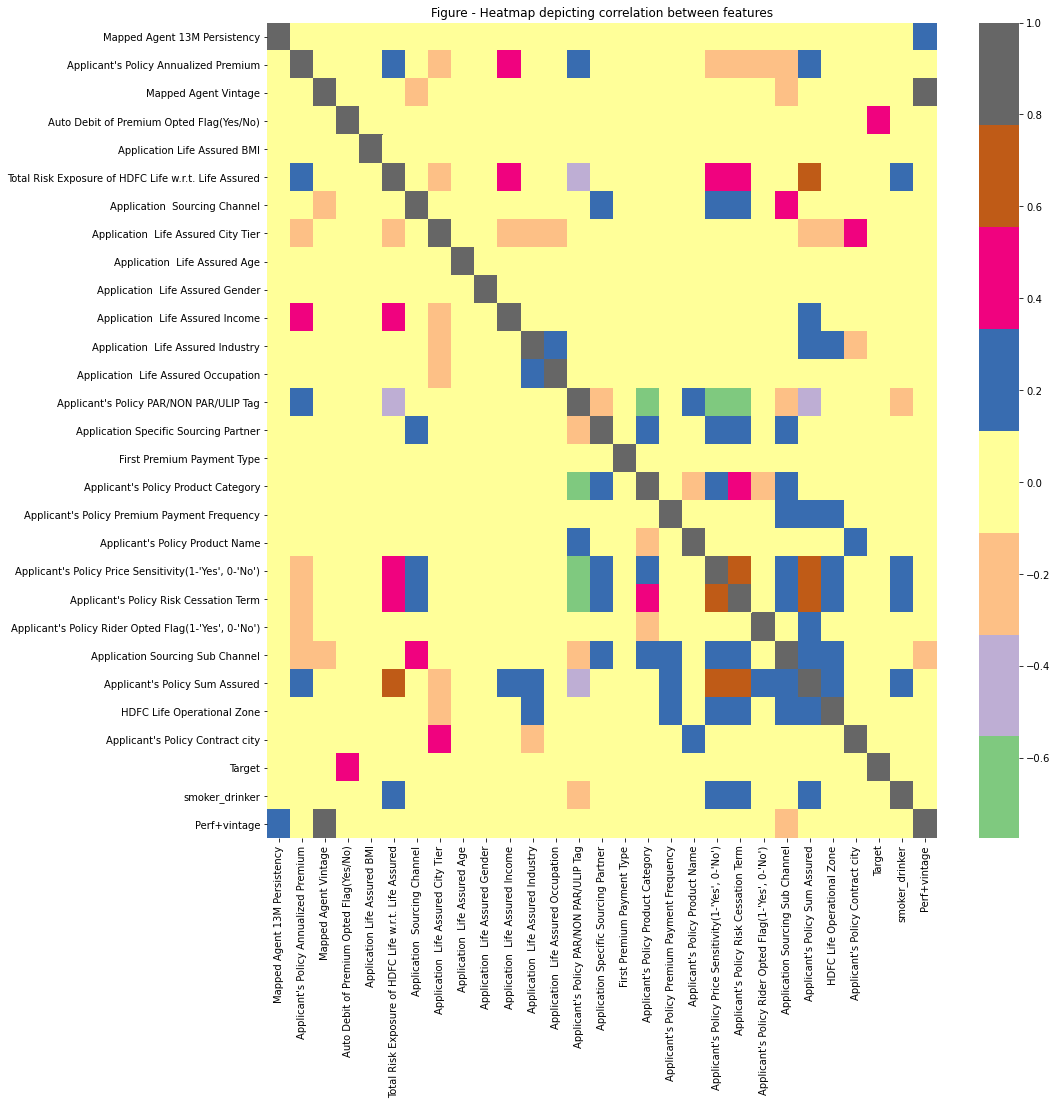

In [41]:
# Plot the heatmap for features with moore than 4
plt.figure( figsize = (15,15))
sns.heatmap(Plot, cmap="Accent");
plt.title( "Figure - Heatmap depicting correlation between features");

## Random Forest

In [57]:
## Features for training and testing purpose(Indepedndent variable)
x = df.loc[:, df.columns != 'Target']
x.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City Tier',
       'Application  Life Assured Age', 'Application  Life Assured Gender',
       'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Category',
       'Applicant's Policy Premium Payment Frequency',
       'Applicant's Policy Product Name',
       'Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')',
       'Applicant's Policy Risk Cessation Term',
       'Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')',
      

In [43]:
y=df['Target']
y

0        1
1        1
2        1
3        1
4        1
        ..
25315    0
25316    0
25317    0
25318    0
25319    1
Name: Target, Length: 25320, dtype: int64

In [44]:
from sklearn.ensemble import RandomForestClassifier
features_label = x.columns
forest = RandomForestClassifier (n_estimators = 100, random_state=0, n_jobs = -1)
forest.fit(x,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(x.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Mapped Agent 13M Persistency   0.273912
 2) Applicant's Policy Annualized Premium 0.073184
 3) Mapped Agent Vintage           0.064263
 4) Auto Debit of Premium Opted Flag(Yes/No) 0.059023
 5) Application Life Assured BMI   0.058885
 6) Total Risk Exposure of HDFC Life w.r.t. Life Assured 0.051690
 7) Application  Sourcing Channel  0.040130
 8) Application  Life Assured City Tier 0.033894
 9) Application  Life Assured Age  0.032083
10) Application  Life Assured Gender 0.031879
11) Application  Life Assured Income 0.029568
12) Application  Life Assured Industry 0.027852
13) Application  Life Assured Occupation 0.027613
14) Applicant's Policy PAR/NON PAR/ULIP Tag 0.024555
15) Application Specific Sourcing Partner 0.019414
16) First Premium Payment Type     0.019329
17) Applicant's Policy Product Category 0.018877
18) Applicant's Policy Premium Payment Frequency 0.018817
19) Applicant's Policy Product Name 0.018328
20) Applicant's Policy Price Sensitivity(1-'Yes', 0-'No') 0.014655
21)

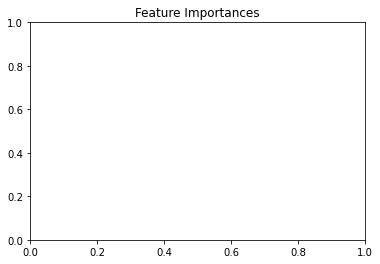

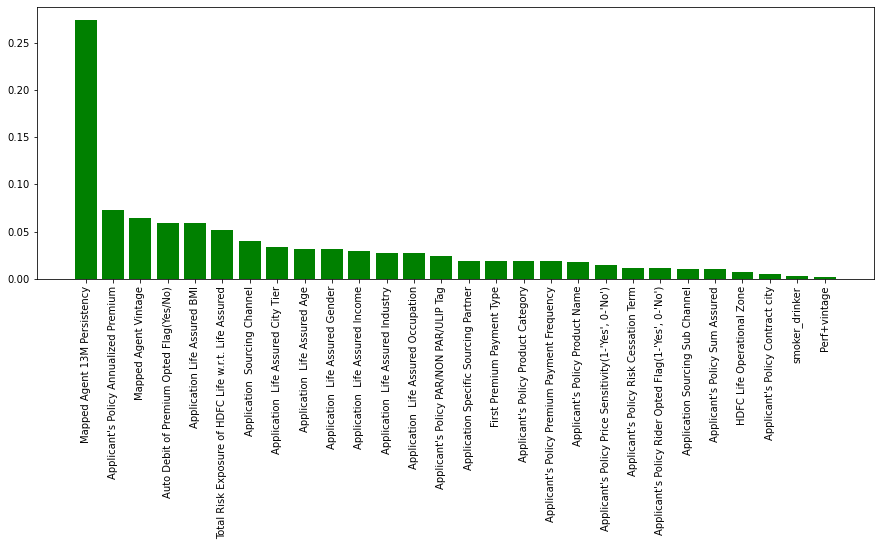

In [45]:
plt.title('Feature Importances')
plt.figure( figsize = (15,5))
plt.bar(range(x.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(x.shape[1]),features_label, rotation=90)
#plt.xlim([-1, x.shape[1]])
plt.show()

In [46]:
df.drop(columns=["Applicant's Policy Contract city"], inplace=True)

In [47]:
from sklearn.preprocessing import PowerTransformer
y = y.values.reshape(-1,1)
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
y = power.fit_transform(y)

In [48]:
## Importing library for training and testing
from sklearn.model_selection import train_test_split
## Importing logistic regression library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import classification_report,confusion_matrix

In [49]:
## Taking 70:30 Ratio of Training and testing
X_train, X_test, y_train, y_test = train_test_split(x,df['Target'],test_size=0.30)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
rfc_pred = rfc.predict(X_test)

In [52]:
conf_mat_test_nb = confusion_matrix(y_test.tolist(),rfc_pred)

[[ 881  762]
 [ 632 5321]]


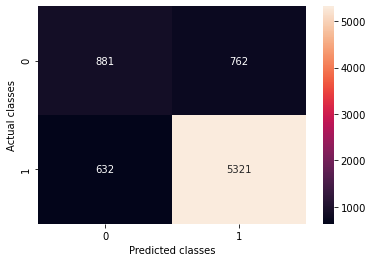

Accuracy: 0.8164823591363876


In [53]:
print(confusion_matrix(y_test,rfc_pred))
sns.heatmap(conf_mat_test_nb,annot = True,fmt="d") 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))

In [54]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56      1643
           1       0.87      0.89      0.88      5953

    accuracy                           0.82      7596
   macro avg       0.73      0.72      0.72      7596
weighted avg       0.81      0.82      0.81      7596



In [409]:
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [410]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [411]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy 0.8172534416610246 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


## TESTING

In [163]:
#Read testing data
df_test = pd.read_csv("testdata.csv")
df_test.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City Tier',
       'Application  Life Assured Age', 'Application  Life Assured Gender',
       'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Category',
       'Applicant's Policy Premium Payment Frequency',
       'Applicant's Policy Product Name',
       'Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')',
       'Applicant's Policy Risk Cessation Term',
       'Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')',
      

In [164]:
df_test['Auto Debit of Premium Opted Flag(Yes/No)']= label_encoder.fit_transform(df_test['Auto Debit of Premium Opted Flag(Yes/No)']) 
df_test['Auto Debit of Premium Opted Flag(Yes/No)'].unique()

array([0, 1])

In [165]:
df_test['Application  Sourcing Channel']= label_encoder.fit_transform(df_test['Application  Sourcing Channel']) 
df_test['Application  Sourcing Channel'].unique() 


array([2, 1, 0, 5, 3, 4, 6])

In [166]:
df_test['Application  Life Assured City Tier']= label_encoder.fit_transform(df_test['Application  Life Assured City Tier']) 
df_test['Application  Life Assured City Tier'].unique()

array([2, 0, 1])

In [167]:
df_test['Application  Life Assured Gender']= label_encoder.fit_transform(df_test['Application  Life Assured Gender']) 
df_test['Application  Life Assured Gender'].unique()

array([0, 1])

In [168]:
df_test['Application  Life Assured Industry']= label_encoder.fit_transform(df_test['Application  Life Assured Industry']) 
df_test['Application  Life Assured Industry'].unique()

array([  0, 174, 139,  31,  72,  53,  98, 230, 229,   4, 104, 169, 153,
        74,  48, 147, 128,   2, 250,  75, 134,  57, 227,  38, 164, 252,
       196,  41, 245, 120,  99, 163, 261, 146, 220, 216, 260,  77,  22,
        59, 145,  35, 223, 103,  17,  83,  80,  13,  96,  28, 121, 201,
       117,  85, 114, 179, 200, 222, 262, 259, 214, 150, 199,  20, 257,
        88, 267, 232, 255, 156, 142, 236,  21, 107,   6,  73,  37, 218,
        27, 159, 208,  95,  76, 129, 112, 135,  93, 172,  68, 211,  90,
       217,  92, 162, 154,  40,  86,  94, 157, 122, 136,  11, 140, 210,
       231, 137, 198, 189, 106, 195,  44, 239,  56, 209,  55, 158,  25,
       240,  52,  97, 213,  64, 165,  14, 241,  33, 188, 242,  24,  26,
       265, 187,  84,  82,  67, 148, 264,  78, 202,  43,  39, 247,  45,
        23, 190,  61, 141,  81, 205, 266, 101, 244, 180, 116, 102, 149,
       181, 152, 253, 251, 192, 269, 256,  50, 110, 155,  71,  70,   7,
       167,   9, 175,  29, 130,  36,  47, 170,  12,  66, 113, 14

In [169]:
df_test['Application  Life Assured Occupation']= label_encoder.fit_transform(df_test['Application  Life Assured Occupation']) 
df_test['Application  Life Assured Occupation'].unique()

array([3, 2, 0, 1, 4])

In [170]:
df_test["Applicant's Policy PAR/NON PAR/ULIP Tag"]= label_encoder.fit_transform(df_test["Applicant's Policy PAR/NON PAR/ULIP Tag"]) 
df_test["Applicant's Policy PAR/NON PAR/ULIP Tag"].unique() 

array([2, 1, 0])

In [171]:
df_test['Application Specific Sourcing Partner']= label_encoder.fit_transform(df_test['Application Specific Sourcing Partner']) 
df_test['Application Specific Sourcing Partner'].unique() 

array([31, 33, 61, 72, 38, 36, 32, 53, 22, 35, 52, 12, 25, 71, 20,  5, 34,
        7, 75, 74, 42, 46, 13, 50, 47, 51, 16, 37, 10, 60, 67, 17, 28, 27,
       14, 68, 49, 58,  8, 24, 55, 45, 63, 54, 56,  4, 23, 39, 62, 19, 76,
       41, 70,  6, 26, 15,  2, 57, 69, 11, 65, 48, 21, 59,  3, 29, 66, 18,
       30,  0, 43, 40, 73,  1, 64, 44,  9])

In [172]:
df_test['First Premium Payment Type']= label_encoder.fit_transform(df_test['First Premium Payment Type']) 
df_test['First Premium Payment Type'].unique() 

array([3, 1, 6, 4, 7, 8, 2, 5, 0])

In [173]:
df_test["Applicant's Policy Product Category"]= label_encoder.fit_transform(df_test["Applicant's Policy Product Category"]) 
df_test["Applicant's Policy Product Category"].unique() 

array([1, 3, 2, 0])

In [174]:
df_test["Applicant's Policy Premium Payment Frequency"]= label_encoder.fit_transform(df_test["Applicant's Policy Premium Payment Frequency"]) 
df_test["Applicant's Policy Premium Payment Frequency"].unique() 

array([0, 1, 2, 3])

In [175]:
df_test["Applicant's Policy Product Name"]= label_encoder.fit_transform(df_test["Applicant's Policy Product Name"]) 
df_test["Applicant's Policy Product Name"].unique()

array([ 4, 14,  1, 17, 15,  8, 16,  2, 18, 13,  3,  7,  9,  6,  0,  5, 11,
       10, 12])

In [176]:
df_test['Application Life Assured State']= label_encoder.fit_transform(df_test['Application Life Assured State']) 
df_test['Application Life Assured State'].unique() 

array([11, 18, 16, 26,  8, 28, 25,  2, 31, 10,  0,  3, 15, 17,  5, 19, 32,
       33, 13, 14, 29,  6, 23, 12,  7,  9, 27, 22,  4, 21, 24, 20,  1, 30])

In [177]:
df_test['Application Sourcing Sub Channel']= label_encoder.fit_transform(df_test['Application Sourcing Sub Channel']) 
df_test['Application Sourcing Sub Channel'].unique() 

array([ 8, 10,  3, 26, 11, 20, 22, 12, 15, 25,  9,  1, 18,  5, 14, 16, 19,
        4, 21,  2, 13,  6, 24,  0, 17,  7, 23])

In [178]:
df_test['HDFC Life Operational Zone']= label_encoder.fit_transform(df_test['HDFC Life Operational Zone']) 
df_test['HDFC Life Operational Zone'].unique() 

array([1, 5, 4, 2, 3, 0])

In [179]:
df_test["Application  Life Assured Age"]= label_encoder.fit_transform(df_test["Application  Life Assured Age"]) 
df_test["Application  Life Assured Age"].unique()

array([32, 20, 49, 31, 45, 26, 42, 56, 41, 46, 38, 30, 19, 44, 50, 25, 24,
       34, 35, 47, 40, 21, 39, 28, 43, 51, 53, 27, 23, 57, 37, 22, 54, 29,
       55, 59, 36, 48, 33, 52, 58, 61, 18, 17, 60, 16,  1, 15,  5, 62,  4,
        2,  9,  8, 14, 11,  3,  0,  6,  7, 12, 13, 10], dtype=int64)

In [180]:
df_test["smoker_drinker"]= label_encoder.fit_transform(df_test["smoker_drinker"]) 
df_test["smoker_drinker"].unique()

array([0, 3, 2, 1])

In [181]:
df_test

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City Tier,Application Life Assured Age,Application Life Assured Gender,...,Applicant's Policy Product Name,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Life Assured State,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,smoker_drinker,Perf+vintage
0,80.32,99999,11,0,21.79931,999990,2,2,32,0,...,4,0,10,1,11,8,1999980,1,0,883.52
1,80.32,60000,22,1,21.30395,600000,2,0,20,1,...,4,0,10,1,18,8,1200000,5,0,1767.04
2,80.32,50000,6,0,21.09619,950000,1,2,49,0,...,14,0,15,1,16,10,1900000,4,0,481.92
3,80.32,25000,3,1,22.77319,250000,2,2,31,0,...,4,0,10,1,26,8,500000,2,0,240.96
4,0.00,95693,28,1,23.33547,686457,0,2,45,1,...,1,0,15,1,18,3,686458,5,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7510,80.32,50000,33,0,24.09297,500000,2,1,36,1,...,14,0,10,0,13,8,500000,1,0,2650.56
7511,80.32,25000,8,1,26.21882,250000,2,1,29,1,...,15,0,10,1,25,9,500000,1,0,642.56
7512,80.32,25260,19,1,23.52941,10000000,0,1,36,1,...,2,1,35,1,17,3,20000000,0,0,1526.08
7513,90.98,50000,59,1,24.80159,500000,1,2,38,1,...,4,0,10,0,10,11,500000,5,0,5367.82


In [182]:
results = rfc.predict(df_test)

In [183]:
results

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [184]:
result = pd.DataFrame(data=results)
result.columns = ['TestTarget']

In [185]:
result.head()

,TestTarget
0,1
1,1
2,0
3,1
4,1


In [186]:
result.to_excel("TestTargetPrediction.xlsx")

## OOT DATA

In [260]:
#Read testing data
df_oot = pd.read_csv("ootdata.csv")
df_oot.columns

Index(['Mapped Agent 13M Persistency',
       'Application Life Assured Alcohol Declaration',
       'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant's  Policy Contract Branch',
       'Application  Life Assured City Tier', 'Application  Life Assured Age',
       'Application  Life Assured Education',
       'Application  Life Assured Gender', 'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Cat

In [261]:
df_oot.drop(columns=[ 'Application Life Assured Alcohol Declaration',"Applicant's  Policy Contract Branch",
       'Application  Life Assured Education','Application  Life Assured Marital Status','Application  Life Assured City',
       'Application  Life Assured Nationality','Application Life Assured Residential Status',
      'Application Life Assured Smoker Declaration',], inplace=True) 

In [262]:
df_oot['Auto Debit of Premium Opted Flag(Yes/No)']= label_encoder.fit_transform(df_oot['Auto Debit of Premium Opted Flag(Yes/No)']) 
df_oot['Auto Debit of Premium Opted Flag(Yes/No)'].unique()

array([1, 0])

In [263]:
df_oot["Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')"]= label_encoder.fit_transform(df_oot["Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')"]) 
df_oot["Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')"].unique()

array([0, 1])

In [264]:
df_oot['Application  Sourcing Channel']= label_encoder.fit_transform(df_oot['Application  Sourcing Channel']) 
df_oot['Application  Sourcing Channel'].unique() 

array([2, 1, 0, 5, 4, 3, 6])

In [265]:
df_oot['Application  Life Assured City Tier']= label_encoder.fit_transform(df_oot['Application  Life Assured City Tier']) 
df_oot['Application  Life Assured City Tier'].unique()

array([0, 2, 1])

In [266]:
df_oot['Application  Life Assured Gender']= label_encoder.fit_transform(df_oot['Application  Life Assured Gender']) 
df_oot['Application  Life Assured Gender'].unique()

array([1, 0])

In [267]:
df_oot['Application  Life Assured Industry']= label_encoder.fit_transform(df_oot['Application  Life Assured Industry']) 
df_oot['Application  Life Assured Industry'].unique()

array([ 56, 167,  18,   0, 220, 206,   4, 155, 234, 104,  33, 133, 121,
       226,  90,  69,  22, 203, 221, 202, 154, 135,  49, 262, 240, 264,
       115,  80, 130, 227, 188,  26,  75, 182,  50, 213, 245, 263,  32,
       105, 251,  35,  28,  48,  74, 113, 175, 210, 136,  84, 122, 161,
        19,  54, 219,  72, 244, 254,   7,  93, 231, 143, 112,  25, 111,
        46,  85, 252, 237,   9,  65,  99, 184,  31, 158, 256, 212, 144,
       258, 164, 186, 268, 171,  92, 253, 145, 126, 102, 265, 177, 141,
        55, 106,  95,  66, 123,  86, 260, 107, 242,  60,   2,  51, 149,
        77,  27, 132,  14, 199, 109, 190, 246, 209, 140, 192,  76, 259,
       150,   1, 101, 218, 228,  67,  52, 110, 166,  15, 205,  94,  38,
         3,  98, 195,  21, 198, 131, 250,  40,  96,  39, 217,  17, 178,
       197, 127,  61,  43, 241, 108, 114, 156, 152, 215,  97,  73,  42,
        70, 266, 243,  58, 183, 125,  44, 211, 117,  88, 232, 257,   5,
        12, 274, 277, 180, 137,  23, 236, 100, 146,  87, 169, 13

In [268]:
df_oot['Application  Life Assured Occupation']= label_encoder.fit_transform(df_oot['Application  Life Assured Occupation']) 
df_oot['Application  Life Assured Occupation'].unique()

array([2, 3, 0, 1, 4])

In [269]:
df_oot["Applicant's Policy PAR/NON PAR/ULIP Tag"]= label_encoder.fit_transform(df_oot["Applicant's Policy PAR/NON PAR/ULIP Tag"]) 
df_oot["Applicant's Policy PAR/NON PAR/ULIP Tag"].unique() 

array([2, 1, 0])

In [270]:
df_oot['Application Specific Sourcing Partner']= label_encoder.fit_transform(df_oot['Application Specific Sourcing Partner']) 
df_oot['Application Specific Sourcing Partner'].unique() 

array([31, 33, 21, 32, 52, 68, 34, 22, 11, 54, 57, 43,  8, 49, 65, 10, 15,
       28, 59, 71, 35,  4, 37, 23,  1, 27, 70, 12, 13, 58, 47, 67, 16, 39,
       24, 50,  5, 63, 48,  3, 25, 62, 18, 17, 20,  0, 56, 14, 29, 53, 55,
        6, 19, 69, 42,  9, 38, 36,  7, 45, 40, 51, 26,  2, 44, 30, 61, 66,
       64, 60, 41, 46])

In [271]:
df_oot['First Premium Payment Type']= label_encoder.fit_transform(df_oot['First Premium Payment Type']) 
df_oot['First Premium Payment Type'].unique() 

array([1, 5, 8, 3, 4, 0, 6, 7, 2])

In [272]:
df_oot["Applicant's Policy Product Category"]= label_encoder.fit_transform(df_oot["Applicant's Policy Product Category"]) 
df_oot["Applicant's Policy Product Category"].unique() 

array([1, 0, 3, 2])

In [273]:
df_oot["Applicant's Policy Premium Payment Frequency"]= label_encoder.fit_transform(df_oot["Applicant's Policy Premium Payment Frequency"]) 
df_oot["Applicant's Policy Premium Payment Frequency"].unique() 

array([0, 1, 2, 3])

In [274]:
df_oot["Applicant's Policy Product Name"]= label_encoder.fit_transform(df_oot["Applicant's Policy Product Name"]) 
df_oot["Applicant's Policy Product Name"].unique()

array([ 3, 13, 15, 14,  6,  8,  1, 16,  5, 12, 17,  4,  0, 18,  2, 10,  9,
       11,  7])

In [275]:
df_oot['Application Life Assured State']= label_encoder.fit_transform(df_oot['Application Life Assured State']) 
df_oot['Application Life Assured State'].unique() 

array([18, 24, 27, 28, 16, 11, 32, 12,  5, 14, 13, 15, 30, 21, 10,  3, 25,
       22,  8,  0, 19, 17, 31, 23,  7,  2,  4,  6,  9, 29, 26, 20,  1])

In [276]:
df_oot['Application Sourcing Sub Channel']= label_encoder.fit_transform(df_oot['Application Sourcing Sub Channel']) 
df_oot['Application Sourcing Sub Channel'].unique() 

array([ 7,  9,  8, 10,  3, 23, 20, 17, 18, 19, 12, 11,  1, 14, 15, 22,  5,
       13, 16,  2,  4,  6,  0, 24, 21])

In [277]:
df_oot['HDFC Life Operational Zone']= label_encoder.fit_transform(df_oot['HDFC Life Operational Zone']) 
df_oot['HDFC Life Operational Zone'].unique() 

array([5, 1, 3, 4, 0, 2])

In [278]:
df_oot["Application  Life Assured Age"]= label_encoder.fit_transform(df_oot["Application  Life Assured Age"]) 
df_oot["Application  Life Assured Age"].unique()

array([34, 36, 42, 47, 31, 27, 46, 39, 55, 52, 38, 44, 54, 24, 59, 41, 33,
       51, 60, 50, 29, 35, 26, 30, 28, 62, 58, 48,  3, 56, 40, 61, 45, 53,
       43, 25, 57,  5, 23,  0, 65,  7, 49, 37, 22, 21, 32, 63, 19, 20, 18,
       64,  4,  8, 17,  1,  2, 13, 15, 11, 10, 14,  9,  6, 12, 16],
      dtype=int64)

In [279]:
df_oot["smoker_drinker"]= label_encoder.fit_transform(df_oot["smoker_drinker"]) 
df_oot["smoker_drinker"].unique()

array([0, 3, 1, 2])

In [280]:
results_oot = rfc.predict(df_oot)

In [281]:
result_oot = pd.DataFrame(data=results_oot)
result_oot.columns = ['OOTarget']

In [282]:
result_oot.head()

,OOTarget
0,1
1,1
2,1
3,1
4,1


In [283]:
result_oot.to_excel("OOTTargetPrediction.xlsx")